In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Tanh

In [5]:
class Tanh():
    def __call__(self, x):
        return 2 / (1 + np.exp(-2*x)) - 1

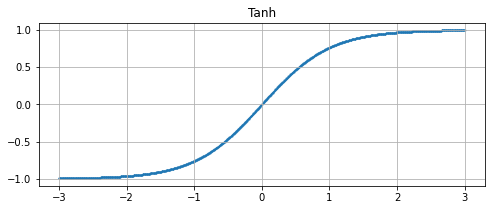

In [6]:
x = np.linspace(-3, 3, 1000)
y = Tanh()(x)

plt.figure(figsize=[8, 3])
plt.title('Tanh')
plt.scatter(x, y, s=1)
plt.grid()
plt.show()

### Dense

In [7]:
class Dense:
    def __init__(self, input_dim, output_dim):
        self.w = np.random.randn(input_dim, output_dim)
        self.b = np.zeros((1, output_dim))
        
    def __call__(self, x):
        # x : (batch, input_dim)    
        
        # (batch, output_dim)
        y = x @ self.w + self.b
        return y

In [8]:
x = np.random.randn(2, 16)
y = Dense(16, 32)(x)
print(y.shape)

(2, 32)


### RNNCell

In [9]:
class RNNCell:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        self.dense_ih = Dense(input_dim, hidden_dim)
        self.dense_hh = Dense(hidden_dim, hidden_dim)
        self.activation = activation()
        
    def __call__(self, x, h):
        # x : (batch, input_dim)
        # h : (batch, hidden_dim)
        h = self.activation(self.dense_ih(x) + self.dense_hh(h))
        
        return h

In [10]:
x = np.random.randn(2, 16)
h = np.random.randn(2, 32)
y = RNNCell(16, 32)(x, h)
print(y.shape)

(2, 32)


### RNN

$h^{\prime}=\tanh \left(W_{i h} x+b_{i h}+W_{h h} h+b_{h h}\right)$

In [11]:
class RNN:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        self.hidden_dim = hidden_dim
        self.rnn_cell = RNNCell(input_dim, hidden_dim, activation)
    
    def __call__(self, x):
        # x : (batch, length, input_dim)
        batch, length, input_dim = x.shape
        
        h = np.zeros((batch, self.hidden_dim))
        y = []
        for l in range(length):
            # (batch, input_dim)
            x_ = x[:, l, :]
            # (batch, hidden_dim)
            h = self.rnn_cell(x_, h)
            y.append(h)
        
        # (batch, length, hidden_dim)
        y = np.stack(y, axis=1)
        
        return y
        

In [12]:
x = np.random.randn(2, 100, 16)
y = RNN(16, 32)(x)
print(y.shape)

(2, 100, 32)


### GRU를 numpy로 구현해봅시다.

\begin{aligned}
&r=\sigma\left(W_{i r} x+b_{i r}+W_{h r} h+b_{h r}\right) \\
&z=\sigma\left(W_{i z} x+b_{i z}+W_{h z} h+b_{h z}\right) \\
&n=\tanh \left(W_{i n} x+b_{i n}+r *\left(W_{h n} h+b_{h n}\right)\right) \\
&h^{\prime}=(1-z) * n+z * h
\end{aligned}

In [16]:
class Sigmoid():
    def __call__(self, x):
        pass

In [17]:
class GRUCell:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        pass

In [18]:
class GRU:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        pass

### LSTM을 numpy로 구현해봅시다.

\begin{aligned}
&i=\sigma\left(W_{i i} x+b_{i i}+W_{h i} h+b_{h i}\right) \\
&f=\sigma\left(W_{i f} x+b_{i f}+W_{h f} h+b_{h f}\right) \\
&g=\tanh \left(W_{i g} x+b_{i g}+W_{h g} h+b_{h g}\right) \\
&o=\sigma\left(W_{i o} x+b_{i o}+W_{h o} h+b_{h o}\right) \\
&c^{\prime}=f * c+i * g \\
&h^{\prime}=o * \tanh \left(c^{\prime}\right)
\end{aligned}

In [19]:
class LSTMCell:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        pass

In [20]:
class LSTM:
    def __init__(self, input_dim, hidden_dim, activation=Tanh):
        pass